# CSE 6367
# Programming Assignment 4 (P4)

## Eigenfaces (100 points)

### Task 1 (25 points)
1. Load all the 25 images in the "/Eigenfaces/Train"
2. Display all the original faces in a 5X5 grid.
3. Find the mean face image. Perform PCA on the training faces.
4. Display the mean face.
5. Diplay all the eigenfaces in a 5X5 grid.

In [17]:
import cv2
import numpy as np
import os
from zipfile import ZipFile


# Step 1: Load all the 25 images in the "/Eigenfaces/Train" folder
#1. Load all the 25 images in the "/Eigenfaces/Train"


zip_path = 'PA4.zip'  # Update this to the location of your zip file

with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('PA4')

In [18]:
#1. Load images
train_dir = 'PA4/' + 'PA4/Eigenfaces/Train'
image_files = sorted(os.listdir(train_dir))  # Sorting to maintain order
train_images = [cv2.imread(os.path.join(train_dir, f), cv2.IMREAD_GRAYSCALE) for f in image_files if f.endswith('.jpg')]

normalized_train_images = []
for img in train_images:
    img_float = img.astype(np.float32)
    #Brightness and Contrast Normalization
    normalized_img = (img_float - np.mean(img_float)) / np.std(img_float)
    normalized_train_images.append(normalized_img)


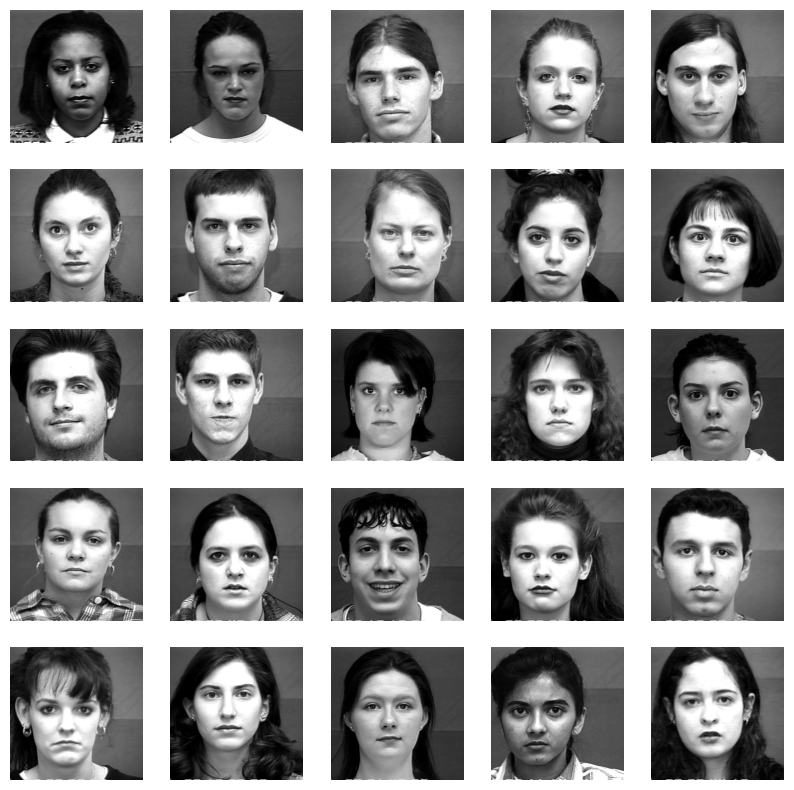

In [19]:
#2. Display all the original faces in a 5X5 grid.
import matplotlib.pyplot as plt

fig, ax = plt.subplots(5, 5, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(train_images[i], cmap='gray')
    axi.axis('off')
plt.show()

In [20]:
# Step 3: Find the mean face image
mean_face = np.mean(normalized_train_images, axis=0)

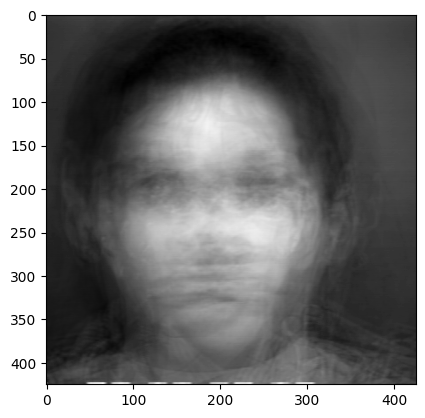

In [21]:
# Step 4: Display the mean face
plt.imshow(mean_face,cmap= 'gray')

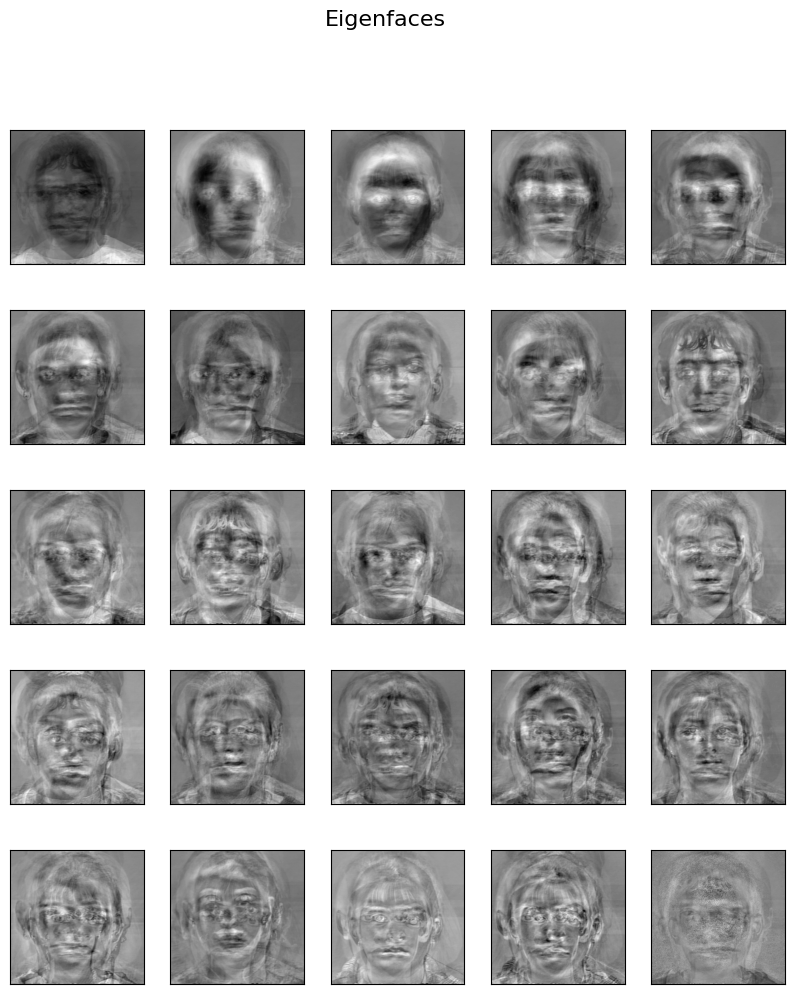

In [22]:
# Step 5: Display all the original faces in a 5X5 grid


def display_images(images, title, n_row, n_col):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
    plt.show()


from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Step 5: Perform PCA on the training faces using sklearn's PCA
#for img in train_images:
#  img = (img - np.mean(img))/(np.std(img))
flattened_images = np.array([img.flatten() for img in normalized_train_images])

pca = PCA(n_components=25)
pca.fit(flattened_images)
eigenvectors = pca.components_

# Step 6: Display all the eigenfaces in a 5X5 grid

data = np.array([img.flatten() for img in normalized_train_images])
eig_values, eig_vectors = cv2.PCACompute(data, mean=None, maxComponents = 25)
eigenfaces = eig_vectors.reshape(-1, 425, 425)  # Reshape eigenvectors to image size
display_images(eigenfaces, "Eigenfaces", 5, 5)


### Task 2 (25 points) - done

1. Select k = 3 eigenfaces (eigenvectors that correspond to the largest eigenvalues).
2. Reconstruct the training faces and display the reconstructed faces in a 5X5 grid.
3. Repeat the process for k = 7 and k = 15. For each k, reconstruct the training faces and display the reconstructed image in a 5X5 grid.

In [23]:
# Function to reconstruct faces using k eigenfaces
def reconstruct_faces(images, eigenvectors, mean_face, k):
    reconstructed_images = []
    for img in images:
        weights = np.dot(eigenvectors[:k], (img.flatten() - mean_face.flatten()))
        reconstructed_img = mean_face.flatten() + np.dot(weights, eigenvectors[:k])
        reconstructed_img = np.reshape(reconstructed_img, mean_face.shape)
        reconstructed_images.append(reconstructed_img)
    return reconstructed_images


In [ ]:
# Step 5: Display all the original faces in a 5X5 grid
def display_images(images, num_cols=5, figsize=(10, 10)):
    num_rows = (len(images) - 1) // num_cols + 1
    plt.figure(figsize=figsize)
    for i, img in enumerate(images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.show()
for k in [3, 7, 15]:
    reconstructed_images = reconstruct_faces(normalized_train_images, eigenvectors, mean_face, k)
    print(f"Reconstructed images for k = {k}:")
    display_images(reconstructed_images)

### Task 3 (25 points)
1. Load all the test images from "/Eigenfaces/Test" - done
2. Project each image on the k = 3 eigenvectors and find if it's a face. If it's a face, find it's closest training image. Use euclidean distance to calculate distance.
3. Display all the results in an M X 2 table, where M is total no of test images. Each row of the table displays two images. The image on the left is the test image. The image on the right is it's closest image in the eigenfaces space. If an image is classified as a non-face, then the second column in the table should be blank.
4. Repeat the process and display the results for k = 7, k = 15.

In [25]:
#1. Load images
train_dir = 'PA4/' + 'PA4/Eigenfaces/Test'
image_files = sorted(os.listdir(train_dir))  # Sorting to maintain order
test_images = [cv2.imread(os.path.join(train_dir, f), cv2.IMREAD_GRAYSCALE) for f in image_files if f.endswith('.jpg')]

#2. Display all the original faces in a 5X5 grid.

# Assuming 'train_images' is a list of images, where each image is a NumPy array
normalized_test_images = []
for img in test_images:
    # Ensure img is in float format to maintain precision during normalization
    img_float = img.astype(np.float32)
    # Normalize the image
    normalized_img = (img_float - np.mean(img_float)) / np.std(img_float)
    # Append the normalized image to the new list
    normalized_test_images.append(normalized_img)


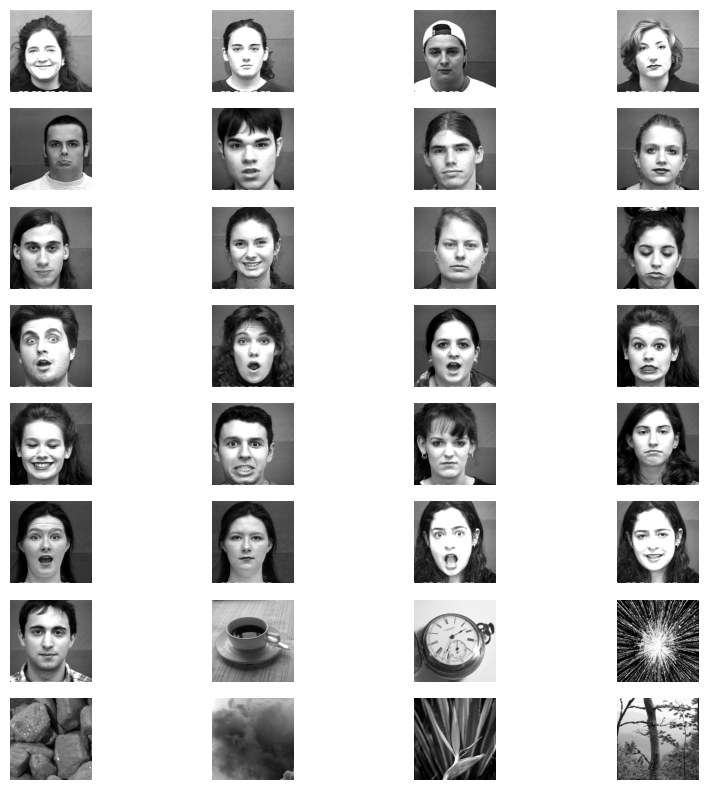

In [26]:
# Step 2: Display all the original faces in a 5X5 grid
def display_images(images, num_cols=5, figsize=(10, 10)):
    num_rows = (len(images) - 1) // num_cols + 1
    plt.figure(figsize=figsize)
    for i, img in enumerate(images):
        plt.subplot(8, 4, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.show()
display_images(test_images)


In [27]:
#3. Function to reconstruct faces using k eigenfaces
def reconstruct_faces(images, eigenvectors, mean_face, k):
    reconstructed_images = []
    for img in images:
        weights = np.dot(eigenvectors[:k], (img.flatten() - mean_face.flatten()))
        reconstructed_img = mean_face.flatten() + np.dot(weights, eigenvectors[:k])
        reconstructed_img = np.reshape(reconstructed_img, mean_face.shape)
        reconstructed_images.append(reconstructed_img)
    return reconstructed_images

distance_from_mean_face = []
reconstructed_images = reconstruct_faces(normalized_test_images, eigenvectors, mean_face, 15)
for i in range(len(normalized_test_images)):
    distance_from_mean_face.append(np.sum((normalized_test_images[i] - reconstructed_images[i]) ** 2)/1000)

face_images = []
nonface_images = []
threshold = np.percentile(distance_from_mean_face, 81)

for i in range(len(normalized_test_images)):
    if distance_from_mean_face[i] <= threshold:
      #print(f'Face Image {i+1}, Distance from reconstructed face = {distance_from_mean_face[i]}')
      face_images.append(i)
    else:
      #print(f'Non- Face Image {i+1}, Distance from reconstructed face = {distance_from_mean_face[i]}')
      nonface_images.append(i)



In [ ]:
import cv2
import numpy as np
import os
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt


# Function to project an image onto the k eigenvectors
def project_image(image, eigenvectors, mean_face, k):
    image_flat = image.flatten()
    weights = np.dot(eigenvectors[:k], (image_flat - mean_face.flatten()))
    return weights

def find_closest_image(i,test_image, train_images, eigenvectors, mean_face, k):
    test_weights = project_image(test_image, eigenvectors, mean_face, k)
    train_weights = np.array([project_image(img, eigenvectors, mean_face, k) for img in train_images])
    distances = cdist([test_weights], train_weights, 'euclidean')
    closest_index = np.argmin(distances)
    closest_distance = distances[0,closest_index]
    if i in face_images:
      return train_images[closest_index], closest_distance
    else:
      return None, None  # Return None for both image and distance for non-faces


def display_results(test_images, train_images, eigenvectors, mean_face, k):
    num_test_images = len(test_images)
    plt.figure(figsize=(10, 5 * num_test_images))

    for i, test_img in enumerate(normalized_test_images):
        closest_img, distance = find_closest_image(i,test_img, normalized_train_images, eigenvectors, mean_face, k)
        plt.subplot(num_test_images, 2, 2 * i + 1)
        plt.imshow(test_img, cmap='gray')
        plt.title('Test Image')
        plt.axis('off')

        plt.subplot(num_test_images, 2, 2 * i + 2)
        if closest_img is not None:
            plt.imshow(closest_img, cmap='gray')
            #plt.title(f'Closest Image\nDistance: {distance:.2f}')
        else:
            plt.imshow(np.zeros_like(test_img), cmap='gray')
            plt.title('Non-Face')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display results for k = 3, 7, and 15
for k in [3,7,15]:
    print(f"Results for k = {k}:")
    display_results(normalized_test_images, normalized_train_images, eigenvectors, mean_face, k)


### Task 4 (25 points)
Plot the percent classification error rate as a function of k. k should range from 1 to N (where N is the number of images in the training set)

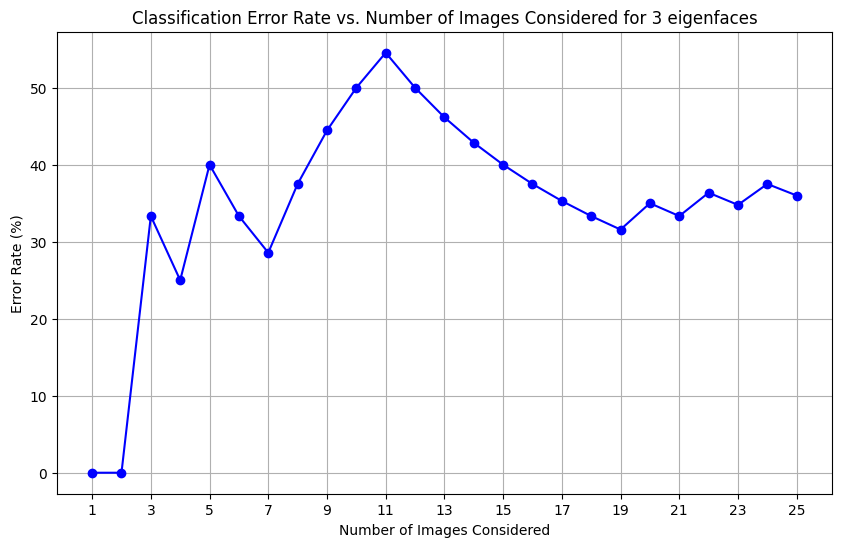

In [28]:
image_files = sorted(os.listdir(train_dir))
image_files = image_files[1:]
extracted_parts = [f.split('_')[1] for f in image_files]
mindist_capture = {}
for k in [3]:
    reconstructed_images = reconstruct_faces(normalized_train_images, eigenvectors, mean_face, k)
    for i in range(len(normalized_train_images)):
        min_dist = np.inf
        min_index = 0
        for j in range(len(normalized_train_images)):
            dist = np.sum((reconstructed_images[i] - normalized_train_images[j])**2)
            if dist <= min_dist:  # Use < to find the strictly closer images.
                min_dist = dist
                min_index = j
                #print(min_dist/1000)
        mindist_capture[i] =  min_index
N = len(train_images)
incremental_error_rates = []

for l in range(1, N+1 ):
    error_count = 0
    for i in range(l):
        actual_label = int(image_files[i][:10].split('_')[1])
        predicted_label_index = mindist_capture[i]
        predicted_label = int(image_files[predicted_label_index][:10].split('_')[1])

        if actual_label != predicted_label:
            error_count += 1

    # Calculate the error rate based on how many images we're considering in this iteration
    error_rate = (error_count / l) * 100
    incremental_error_rates.append(error_rate)

# Plotting the incremental error rates
plt.figure(figsize=(10, 6))
plt.plot(range(1, N + 1), incremental_error_rates, marker='o', linestyle='-', color='b')
plt.title('Classification Error Rate vs. Number of Images Considered for 3 eigenfaces')
plt.xlabel('Number of Images Considered')
plt.ylabel('Error Rate (%)')
plt.grid(True)
plt.xticks(range(1, N + 1, max(N // 10, 1)))  # Adjust x-axis ticks for clarity
plt.show()


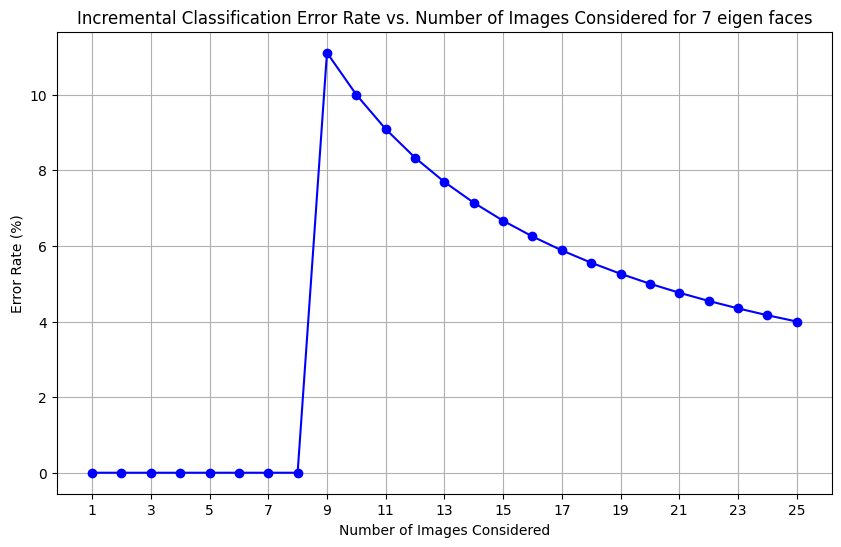

In [29]:
mindist_capture = {}
for k in [7]:
    reconstructed_images = reconstruct_faces(normalized_train_images, eigenvectors, mean_face, k)
    for i in range(len(normalized_train_images)):
        min_dist = np.inf
        min_index = 0
        for j in range(len(normalized_train_images)):
           # if i == j:
           #     continue
            dist = np.sum((reconstructed_images[i] - normalized_train_images[j])**2)
            if dist <= min_dist:
                min_dist = dist
                min_index = j
        mindist_capture[i] =  min_index
N = len(train_images)
incremental_error_rates = []

for l in range(1, N+1 ):
    error_count = 0
    for i in range(l):
        actual_label = int(image_files[i][:10].split('_')[1])
        predicted_label_index = mindist_capture[i]
        predicted_label = int(image_files[predicted_label_index][:10].split('_')[1])

        if actual_label != predicted_label:
            error_count += 1

    error_rate = (error_count / l) * 100
    incremental_error_rates.append(error_rate)

# Plotting the incremental error rates
plt.figure(figsize=(10, 6))
plt.plot(range(1, N + 1), incremental_error_rates, marker='o', linestyle='-', color='b')
plt.title('Incremental Classification Error Rate vs. Number of Images Considered for 7 eigen faces')
plt.xlabel('Number of Images Considered')
plt.ylabel('Error Rate (%)')
plt.grid(True)
plt.xticks(range(1, N + 1, max(N // 10, 1)))
plt.show()


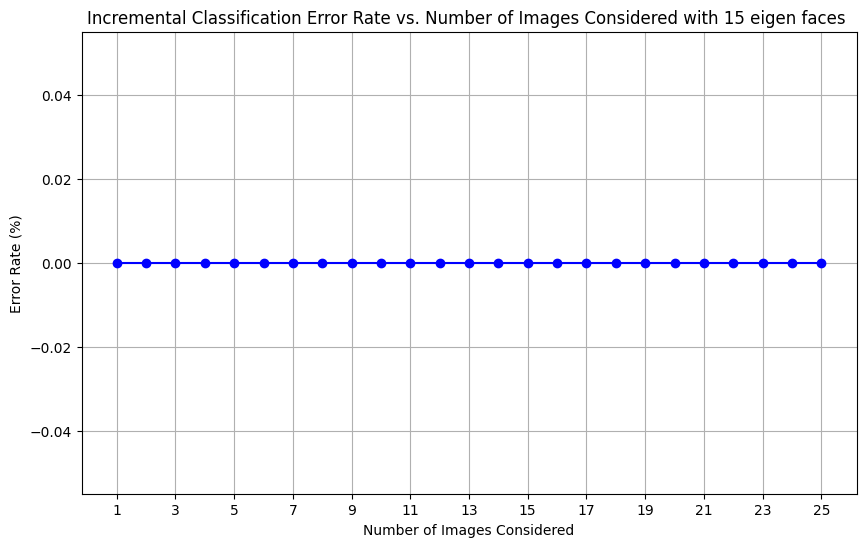

In [30]:
mindist_capture = {}
for k in [15]:
    reconstructed_images = reconstruct_faces(normalized_train_images, eigenvectors, mean_face, k)
    for i in range(len(normalized_train_images)):
        min_dist = np.inf
        min_index = 0
        for j in range(len(normalized_train_images)):
            #if i == j:
            #    continue
            dist = np.sum((reconstructed_images[i] - normalized_train_images[j])**2)
            if dist <= min_dist:  # Use < to find the strictly closer images.
                min_dist = dist
                min_index = j
                #print(min_dist/1000)
        mindist_capture[i] =  min_index
N = len(train_images)
incremental_error_rates = []

for l in range(1, N+1 ):
    error_count = 0
    for i in range(l):
        actual_label = int(image_files[i][:10].split('_')[1])
        predicted_label_index = mindist_capture[i]
        predicted_label = int(image_files[predicted_label_index][:10].split('_')[1])

        if actual_label != predicted_label:
            error_count += 1

    error_rate = (error_count / l) * 100
    incremental_error_rates.append(error_rate)

# Plotting the incremental error rates
plt.figure(figsize=(10, 6))
plt.plot(range(1, N + 1), incremental_error_rates, marker='o', linestyle='-', color='b')
plt.title('Incremental Classification Error Rate vs. Number of Images Considered with 15 eigen faces ')
plt.xlabel('Number of Images Considered')
plt.ylabel('Error Rate (%)')
plt.grid(True)
plt.xticks(range(1, N + 1, max(N // 10, 1)))
plt.show()


### Submission Guidelines:
1. Submit through Canvas your source code in a single .ipynb file. The name of the .ipynb file should be YourStudentID.ipynb
2. Import all the images from the ./Eigenfaces directory. Your TA will use the same directory name to grade your submission.
3. You don't need to attach the dataset with your submission.

Assignment Courtesy: Prof. Farhad Kamangar, CSE@UTA